# Matplotlib 2 : Sensationalising the plots

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

In [2]:
%matplotlib inline

In [3]:
def f(t):
    """Python function to calculate a enclosed sinusoid"""
    val = 1 / ((t-2.5)**2 + 1) * np.cos(4*np.pi*t)
    return val

t = np.arange(0.0, 5.0, 0.02)

## Modifying axis characteristics

Axis characteristics include position and customizing ticks and spines.

### Ticks

Ticks are the values used to show specific points on the coordinate axis. It can be a number or a string.  
Whenever we plot a graph, the axes adjust and take the default ticks. Matplotlib’s default ticks are generally sufficient in common situations but are in no way optimal for every plot.  
Here, we will see how to customize these ticks as per our need.

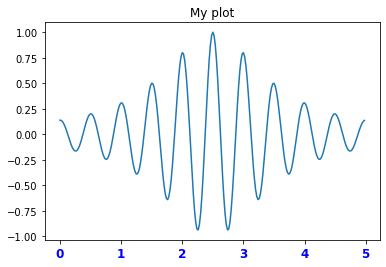

In [4]:
fig = plt.figure() # Initialize the figure and subplot
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, f(t))

# Set the font size via a keyword argument
ax.set_title("My plot", fontsize='large')

# Retrieve an element of a plot and set properties
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize('large')
    tick.set_color('blue')
    tick.set_weight('bold')

In some cases, you may want to specify which tick locations should be shown. This can be done with:

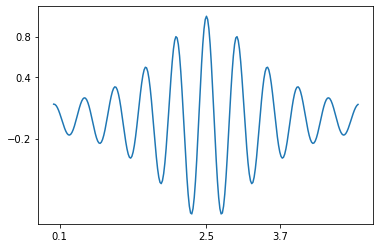

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([0.1, 2.5, 3.7])
ax.set_yticks([-0.2, 0.4, 0.8])
ax.plot(t, f(t))

It is also easy to specify what the label strings should be explicitly.

[Text(0, 0, 'first'), Text(0, 0, 'second'), Text(0, 0, 'third')]

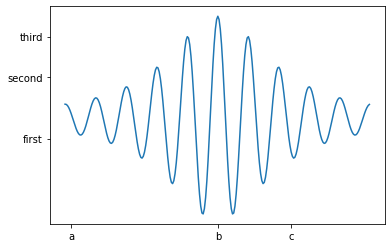

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(t, f(t))

ax.set_xticks([0.1, 2.5, 3.7])
ax.set_xticklabels(['a', 'b', 'c'])
ax.set_yticks([-0.2, 0.4, 0.8])
ax.set_yticklabels(['first', 'second', 'third'])

If you want to change the tick labels with set_ticklabels(), use this function with set_ticks() hand-in-hand to make it easy to know which ticks you are assigning the labels for.  
This can be used for example if you would like to make a plot as a function of spectral type, or if you want to format the labels in a very specific way.

Text(0, 0.5, 'Number of sources')

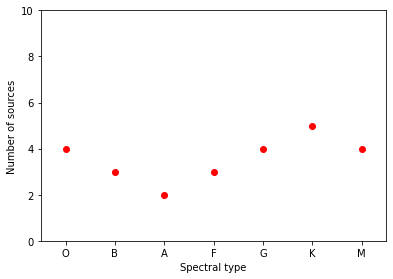

In [7]:
# Initialize figure and axes
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Define spectral types
spectral_id = [1, 2, 3, 4, 5, 6, 7]
spectral_types = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# Plot the data
ax.plot(spectral_id, [4, 3, 2, 3, 4, 5, 4], 'ro')

# Set the limits
ax.set_xlim(0.5, 7.5)
ax.set_ylim(0, 10)

# Set the custom ticks on the x-axis
ax.set_xticks(spectral_id)
ax.set_xticklabels(spectral_types)

# Set the axis labels
ax.set_xlabel("Spectral type")
ax.set_ylabel("Number of sources")

In the following figure,  
Axes 1 shows how to hide ticks and labels on the x axis.  
Axes 2 shows how to hide only labels, not the ticks.

[]

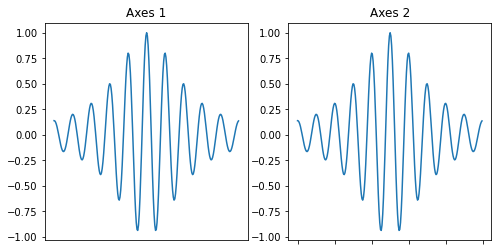

In [8]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(t,f(t))
ax2.plot(t,f(t))

ax1.set(title = 'Axes 1')
ax2.set(title = 'Axes 2')

ax1.set_xticks([])
ax2.set_xticklabels('')

### Spines

Spines are the lines connecting the axis tick marks and noting the boundaries of the data area. They can be placed at arbitrary positions.  
See [function:set_position](https://matplotlib.org/api/spines_api.html#matplotlib.spines.Spine.set_position) for more information.

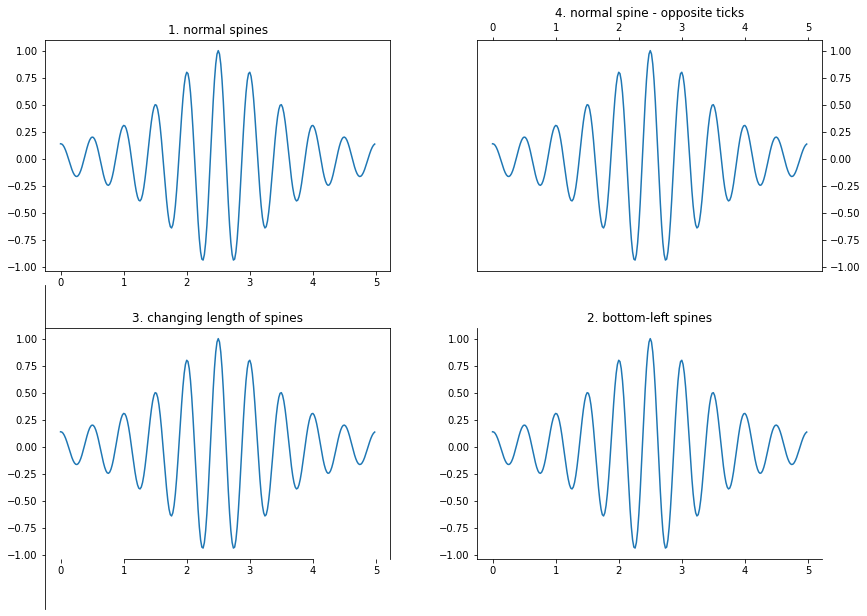

In [9]:
# Constrained layout makes sure the labels don't overlap the axes.
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_axes([0.1, 0.6, 0.4, 0.4])
ax1.plot(t, f(t))
ax1.set_title('1. normal spines')

ax2 = fig.add_axes([0.6, 0.1, 0.4, 0.4])
ax2.plot(t, f(t))
ax2.set_title('2. bottom-left spines')

ax3 = fig.add_axes([0.1, 0.1, 0.4, 0.4])
ax3.plot(t, f(t))
ax3.set_title('3. changing length of spines')

ax4 = fig.add_axes([0.6, 0.6, 0.4, 0.4])
ax4.plot(t, f(t))
ax4.set_title('4. normal spine - opposite ticks')

# Hide the right and top spines
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Only draw spine between the certain ticks
ax3.spines['left'].set_bounds(-1.5, 1.5)
ax3.spines['bottom'].set_bounds(1 ,4)

# Switching tick position
ax4.yaxis.set_ticks_position('right')
ax4.xaxis.set_ticks_position('top')

### Secondary axis

This is different from [Twin Axes](./1.ipynb#Twin-Axes) as in this you can create another x-axis or y-axis on which you can have different scale for the same plot.  
For example, here, one x-axis shows angle in degrees while other in radians.

Text(0.5, 0, 'angle [rad]')

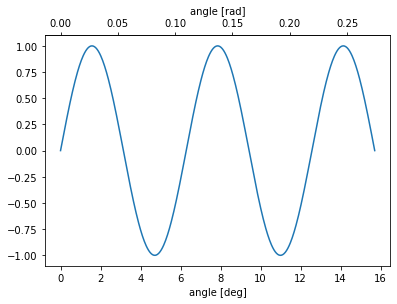

In [10]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

x = np.linspace(0, 5*np.pi, 500)

ax.plot(x, np.sin(x))

ax.set_xlabel('angle [deg]')

def deg2rad(x):
    return x * np.pi / 180

def rad2deg(x):
    return x * 180 / np.pi

secax = ax.secondary_xaxis(location='top', functions=(deg2rad, rad2deg))
secax.set_xlabel('angle [rad]') # Set the label this way as set_xlabel is for the primary axis.

secondary_xaxis() created a secondary x-axis.  
The first and required parameter is location (where you want it to be).  
This secondary axis can have a different scale than the main axis by providing both a forward and an inverse conversion function in a tuple to the functions kwarg (keyword argument).  

## Working with text and shapes

This includes making legends, text fields, annotations and common shapes.

### Legend and its positioning

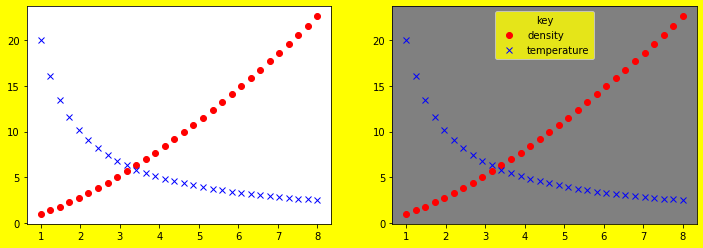

In [11]:
# facecolor is an atribute of figure, axes(plot), legend (any box)

fig = plt.figure(figsize=(12,4), facecolor='yellow')
ax1 = fig.add_subplot(1, 2, 1)

x = np.linspace(1, 8, 30)
ax1.plot(x, x ** 1.5, 'ro', label='density')
ax1.plot(x, 20/x, 'bx', label='temperature')

ax2 = fig.add_subplot(1, 2, 2, facecolor='grey')
ax2.plot(x, x ** 1.5, 'ro', label='density')
ax2.plot(x, 20/x, 'bx', label='temperature')

plt.legend(loc='best', facecolor='yellow', title='key')
# loc can be 'best' or something like 'bottom left' or 'center'

### Colorbar

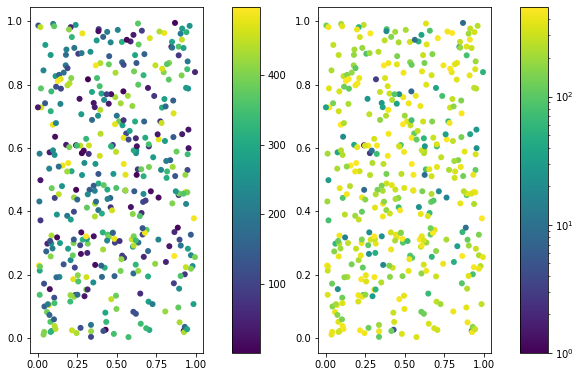

In [12]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_axes([0.1, 0.1, 0.3, 0.8])
ax2 = fig.add_axes([0.6, 0.1, 0.3, 0.8])
x = np.random.random(400)
y = np.random.random(400)
c = np.random.randint(low=1, high=500, size=400)

s1 = ax1.scatter(x, y, c=c, edgecolor='none') # c is for color
s2 = ax2.scatter(x, y, c=c, edgecolor='none', norm=matplotlib.colors.LogNorm()) # colorbar is logarithmic

colorbar_ax1 = fig.add_axes([0.45, 0.1, 0.05, 0.8])
colorbar_ax2 = fig.add_axes([0.95, 0.1, 0.05, 0.8])

fig.colorbar(s1, cax=colorbar_ax1) # cax means colorbar axes
fig.colorbar(s2, cax=colorbar_ax2)

Note that colorbar is a __method of the figure__, not the axes. And thus, you should define another axes for it.

### Patches

Matplotlib has another module in it which helps in making common shapes like rectangle, circle, ellipse.

In [13]:
import matplotlib.patches as patches

Rectangle, Ellipse, Circle, Arc, Arrow, Polygon, RegularPolygon, Wedge are commonly used functions of Patches.  

Following we will give you an example of Ellipse and how to include patches inside an Axes.

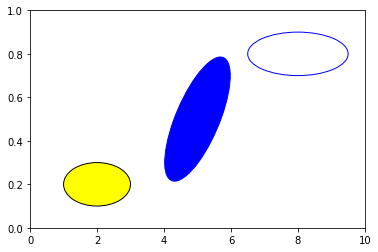

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_xlim([0,10])
el1 = patches.Ellipse(xy=(5,0.5), width=2, height=0.4, angle=12, color='blue')
el2 = patches.Ellipse(xy=(8,0.8), width=3, height=0.2, fill=False, color='blue')
el3 = patches.Ellipse(xy=(2,0.2), width=0.2, height=2, angle=90, facecolor='yellow', edgecolor='black')

ax.add_patch(el1)
ax.add_patch(el2)
ax.add_patch(el3)

In [15]:
# Try the following to find out the parameters using:
# patches.Ellipse?
# patches.Circle?
# patches.Arc?
# patches.Rectangle?
# patches.Arrow?
# patches.Polygon?
# patches.RegularPolygon?
# patches.Wedge?

# Also, type 'patches.' and then press Tab twice for auto-complete (if you didn't discovered until now)

### Text fields

Text(0.7, 0.7, 'axes\n2')

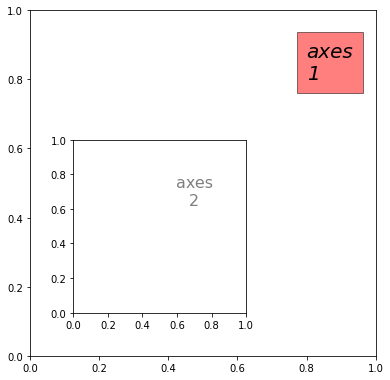

In [16]:
fig = plt.figure(figsize=(6,6))

ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax2 = fig.add_axes([0.2,0.2,0.4,0.4])

ax1.text(x=0.8, y=0.8, s='axes\n1', size=20, style='italic', bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
ax2.text(x=0.7, y=0.7, s='axes\n2', size=16, alpha=0.5, ha='center', va='center')

(x,y) are w.r.t. bottom left corner of the Axes. (Required)  
's' is the string to be shown. (Required)  

'size' is the fontsize.  
'alpha' represents the opacity (0 is transparent, 1 is opaque). Default : alpha = 1   
'style' can be 'bold', 'italic' or 'oblique'

'bbox' is a dictonary containing the features of the bounding box of the text. (patches.Rectangle)

ha, va (horizontal and vertical alignment) Default : ha = 'left', 'va' = 'baseline'  
'ha' causing centering of text horizontally (see '2' in 2nd Text)
'ha' and 'va' also shift the origin of the text field to its center  
(see bottom-left corner of 1st Text corresponds to (0.8, 0.8) of Axes 1 while center of 2nd Text corresponds to (0.7, 0.7) of Axes 2)

### Annotations

Text(0.8, 0.8, 'Better')

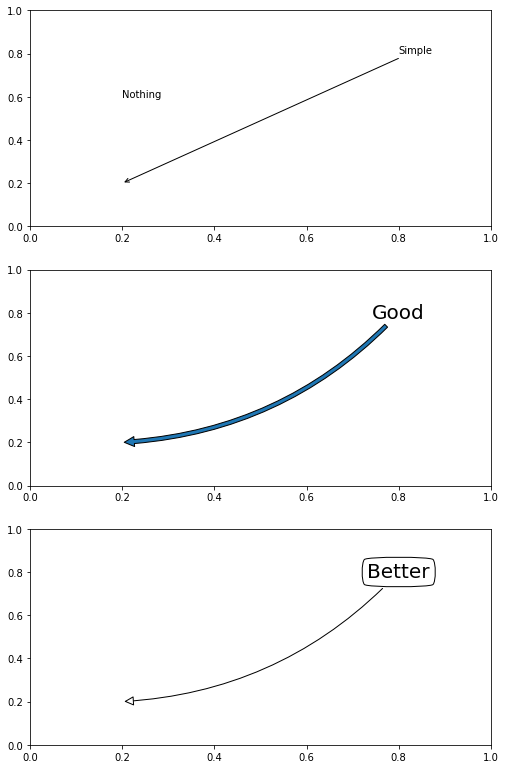

In [17]:
fig = plt.figure(figsize=(8,12))
ax1 = fig.add_axes([0.1, 0.7, 0.8, 0.25])
ax2 = fig.add_axes([0.1, 0.4, 0.8, 0.25])
ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.25])

ax1.annotate(s='Nothing', xy=(0.2, 0.6))

ax1.annotate(s='Simple', xy=(0.2, 0.2), xycoords='data', xytext=(0.8, 0.8), textcoords='data',
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

ax2.annotate(s='Good', xy=(0.2, 0.2), xycoords='data', xytext=(0.8, 0.8), textcoords='data', size=20,
             va='center', ha='center', arrowprops=dict(arrowstyle='simple', connectionstyle='arc3,rad=-0.2'))

ax3.annotate(s='Better', xy=(0.2, 0.2), xycoords='data', xytext=(0.8, 0.8), textcoords='data', size=20,
             va='center', ha='center', bbox=dict(boxstyle='round4', fc='w'),
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))

In [18]:
# These are some of the ways to annotate. To find the meaning of each paramater and more, try:
# plt.annotate?
# patches.FancyArrowPatch?

## Your assignment ...

... should you choose to accept it will be the following:

In the assignment of part 1 of this tutorial, you were asked to plot HR diagrams in different filters and pick out the one best suited to study the cluster. We will now work with that particular plot.

The significance of HR diagrams, as mentioned in the last assignment, is to be able to identify stages in stellar evolution. You will be required to first read up a bit on HR diagrams (hopefully you have already done this as part of the first assignment) to identify parts of an HR diagram with known stages of evolution. You can look [here](https://ase.tufts.edu/cosmos/view_picture.asp?id=1413) to get an idea.

#### Your task:

* In the "best" plot chosen by you, identify the following regions (Note that there can be some ambiguity in these regions as the sections are not clearly defined and they appear different from cluster to cluster, but you should be able to broadly identify the regions):
    * Main sequence
    * Subgiant branch
    * Red Giant branch
    * Asymptotic Giant branch 
    * Horizontal branch 
    * Turn-off point
* Mark out these regions using properly oriented ellipses. Also make sure you label and annotate the plot.
* Add a secondary axis to the plot for luminosty. You must calculate luminosity from the magnitude using the information given below. 

Distance to the cluster is 10.4 kpc. The absolute magnitude of the sun in each wavelength band is 8.553 for F275W, 6.64 for F336W, 5.336 for F438W, 4.727 for F606W and 4.524 for F814W. You may use the following formulae (covered in tutorial 1), and note that each is applicable when each quantity is measured in the particular wavelength band.

$$m = -2.5log\big(\frac{F}{F_0}\big)$$
$$m - M = 5 (log(d)-1)$$

## Solution

In Assignment of Part 1, we concluded that F275 Vs F275-F336 is the best color to study M3 cluster.  
First, we will have to make a plot of it.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
%matplotlib inline
# %matplotlib notebook

In [20]:
path='NGC5272.csv'
F_275 = np.loadtxt(path, usecols=1)
F_336 = np.loadtxt(path, usecols=2)
prob = np.loadtxt(path, unpack=True, usecols=6)

In [21]:
F275, F336 = [], []
for index in range(len(prob)):
    if prob[index]>90:
        F275.append(F_275[index])
        F336.append(F_336[index])

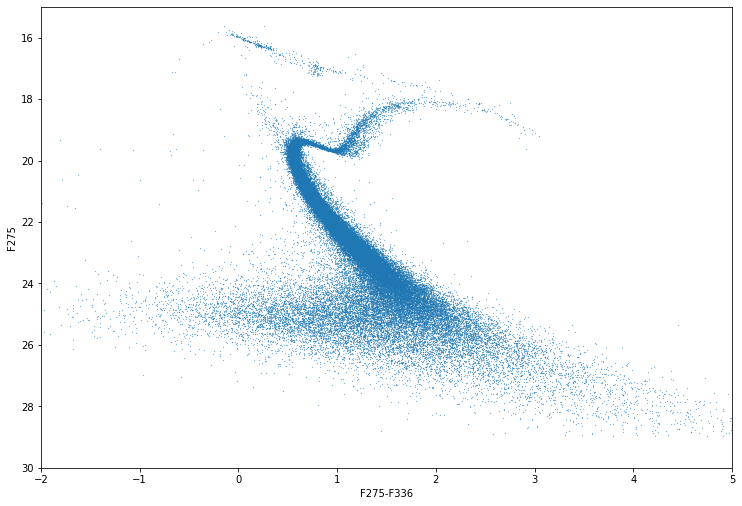

In [22]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], ylim=(30,15), xlim=(-2.0, 5), xlabel='F275-F336', ylabel='F275')

color = [F275[i] - F336[i] for i in range(len(F275))]
ax.scatter(color, F275, s=0.05)

Now, we add the required features.

Text(-0.5, 17, 'Horizontal branch')

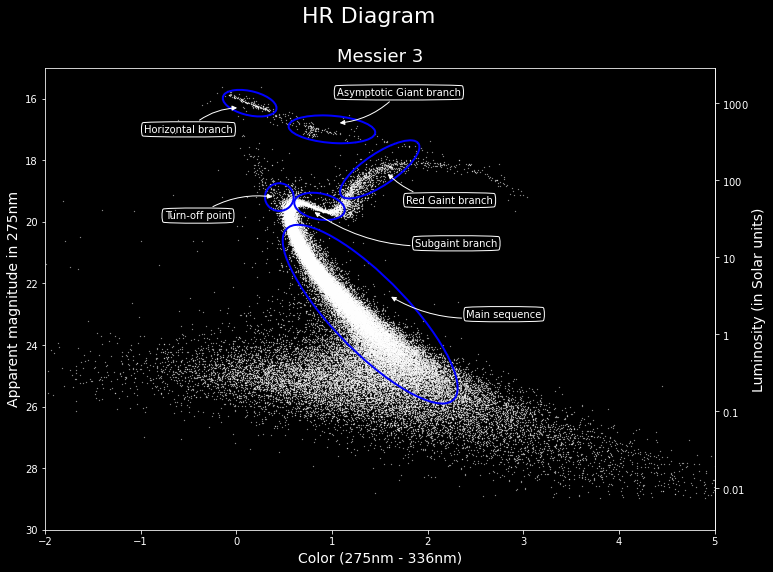

In [23]:
fig = plt.figure(figsize=(12,8.5), facecolor='k')
plt.style.use(['dark_background'])

# Figure title
fig.suptitle('HR Diagram', fontsize=22)

# Making the subplot
ax = fig.add_subplot(111)
ax.set_title('Messier 3', fontsize=18)
ax.set_ylim(30,15)
ax.set_xlim(-2.0, 5)
ax.set_xlabel('Color (275nm - 336nm)', fontsize=14)
ax.set_ylabel('Apparent magnitude in 275nm', fontsize=14)

# Secondary axis
secax = ax.secondary_yaxis(location='right')
secax.set_ylabel('Luminosity (in Solar units)', fontsize=14)
secax.set_yticks([16.14,18.64,21.14,23.64,26.14,28.64])
secax.set_yticklabels(['$1000$','$100$','$10$','$1$','$0.1$','$0.01$'])

# Plot
color = [F275[i] - F336[i] for i in range(len(F275))]
ax.scatter(color, F275, s=0.05, c='w')

# Making ellipses
ms = patches.Ellipse(xy=(1.4,23), width=1, height=6.0, angle=165, color='blue', fill=False, linewidth=2)
to = patches.Ellipse(xy=(0.45,19.2), width=0.3, height=0.9, angle=0, color='blue', fill=False, linewidth=2)
sbg = patches.Ellipse(xy=(0.87,19.5), width=0.5, height=0.9, angle=347, color='blue', fill=False, linewidth=2)
rg = patches.Ellipse(xy=(1.5,18.3), width=0.5, height=2, angle=20, color='blue', fill=False, linewidth=2)
agb = patches.Ellipse(xy=(1.0,17.0), width=1.0, height=0.8, angle=45, color='blue', fill=False, linewidth=2)
hb = patches.Ellipse(xy=(0.14,16.15), width=0.5, height=0.9, angle=340, color='blue', fill=False, linewidth=2)

# Adding ellipses
ax.add_patch(ms)
ax.add_patch(to)
ax.add_patch(sbg)
ax.add_patch(rg)
ax.add_patch(agb)
ax.add_patch(hb)

# Finally, annotating
ax.annotate(s='Main sequence', xy=(1.6, 22.4), xycoords='data', xytext=(2.8, 23.0), textcoords='data',
            size=10, va='center', ha='center', bbox=dict(boxstyle='round4', fill=False),
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='Turn-off point', xy=(0.4, 19.2), xycoords='data', xytext=(-0.4, 19.8), textcoords='data',
            size=10, va='center', ha='center', bbox=dict(boxstyle='round4', fill=False),
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='Subgaint branch', xy=(0.8, 19.65), xycoords='data', xytext=(2.3, 20.7), textcoords='data',
            size=10, va='center', ha='center', bbox=dict(boxstyle='round4', fill=False),
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='Red Gaint branch', xy=(1.57, 18.4), xycoords='data', xytext=(2.23, 19.3), textcoords='data',
            size=10, va='center', ha='center', bbox=dict(boxstyle='round4', fill=False),
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='Asymptotic Giant branch', xy=(1.06, 16.8), xycoords='data', xytext=(1.7, 15.8), textcoords='data',
            size=10, va='center', ha='center', bbox=dict(boxstyle='round4', fill=False),
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))
ax.annotate(s='Horizontal branch', xy=(0.03, 16.3), xycoords='data', xytext=(-0.5, 17), textcoords='data',
            size=10, va='center', ha='center', bbox=dict(boxstyle='round4', fill=False),
            arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3,rad=-0.2', fc='w'))

We are given the apparant magnitude, distance to the cluster and absolute magnitude of sun in 275nm.  
We thus can find the relation between luminosity (in solar units) and apparent magnitude (in 275nm).

There are more things that you can do to this plot. Think more about it and try. Happy Plotting!